# 3 - Evaluation

Based on assignment 3 of [Applied Machine Learning in Python | Coursera](https://www.coursera.org/learn/python-machine-learning)

Goal: Evaluate several model for predicting credit card fraud

Data: [Credit Card Fraud Detection from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud)

Each row of the data corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

sns.set()

### Import data

In [2]:
df = pd.read_csv('data/fraud_data.csv')

print("Fraud rate: {:.3f}".format(df['Class'].mean()))

Fraud rate: 0.016


In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Dummy classifier

In [4]:
from sklearn.dummy import DummyClassifier
    
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    
y_pred = dummy_majority.predict(X_test)

print("accuracy: \t{:.3f}".format(dummy_majority.score(X_test, y_test)))
print("recall: \t{:.3f}".format(recall_score(y_test, y_pred)))

accuracy: 	0.985
recall: 	0.000


### Support Vector classifier

In [17]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("accuracy: \t{:.3f}".format(clf.score(X_test, y_test)))
print("recall: \t{:.3f}".format(recall_score(y_test, y_pred)))  
print("precisoin: \t{:.3f}".format(precision_score(y_test, y_pred)))      

accuracy: 	0.991
recall: 	0.375
precisoin: 	1.000


In [20]:
clf = SVC(C=1e9, gamma=1e07).fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("confusion matrix", confusion)

confusion matrix [[5344    0]
 [  76    4]]


### Logisitic Regression classifier

recall: 	0.787


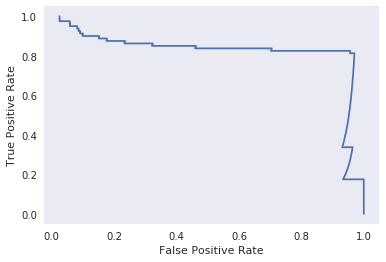

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_scores = clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()


recall = recall_score(y_test, y_pred)   
print("recall: \t{:.3f}".format(recall_score(y_test, y_pred)))  

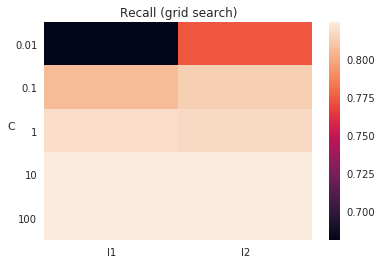

In [28]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

grid_values = {'C' :[0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring='recall')
grid_clf.fit(X_train, y_train)

scores = grid_clf.cv_results_['mean_train_score'].reshape([5,2])

sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);
plt.ylabel("C", rotation=0)
plt.title('Recall (grid search)')